# Datasets for Student projects

In this file, we prepare simplified datasets for student exercises based on the galaxy zoo - the galaxy challenge competition on kaggle
https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge

In the galaxy zoo project, participants are shown galaxy images and asked questions about the morphology of the central galaxy. 
Depending on their answer, they are asked the next question, which results in a complicated hierarchy of labels, which can be seen here
https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge/overview/the-galaxy-zoo-decision-tree



This dataset contains about 60,000 RGB images of galaxies together with a label vector of 37 dimensions.
These labels correspond to answers given to 11 Questions. Each label is a number between 0 and 1 and shows the amount of participants who gave this answer relative to the number of participants that saw the given image.
The galaxy challenge asks competitors to provide a model that reproduces these labels.


In order to run this notebook, you have to download and extract the dataset (images: images_training_rev1.zip, labels: training_solutions_rev1.zip) from here
https://www.kaggle.com/c/galaxy-zoo-the-galaxy-challenge/data

Note that the image files have 424x424 pixels, while the galaxies are contained within the central 207x207 pixels. It is useful to crop the central part and reduce to 64x64 pixels.

In [15]:
## file locations
image_folder = "data/images/images_training_solutions_rev1"
labels_file = "data/labels.csv"

In [16]:
from glob import glob
import shutil
import os
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

def get_labels_train(file_galaxy_labels) -> torch.Tensor:
    df_galaxy_labels = pd.read_csv(file_galaxy_labels)
    return df_galaxy_labels


target_labels = get_labels_train(labels_file)


class GalaxyZooDataset(Dataset):
    def __init__(self):
        file_list = glob(image_folder + "*")
        file_list.sort()
        self.data = [[file, label.values] for file, (_, label) in zip(file_list, target_labels.iterrows())]

    def __len__(self) -> int:
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]
    

dataset = GalaxyZooDataset()


data_loader_original = DataLoader(dataset, batch_size=8, shuffle=False, drop_last=False)

In [7]:
target_labels ## the labels correspond to images GalaxyID.jpg

,Unnamed: 0,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7
0,0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.054453,0.945547,0.201463,0.181684,0.000000,0.00000,0.027227,0.000000,0.027227,0.000000,0.000000,0.000000
1,1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.189149,0.810851,0.000000,0.135082,0.191919,0.00000,0.000000,0.140353,0.000000,0.048796,0.000000,0.000000
2,2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,1.000000,0.000000,0.741864,0.023853,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.320398,0.679602,0.408599,0.284778,0.000000,0.00000,0.000000,0.096119,0.096119,0.000000,0.128159,0.000000
4,4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.029383,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.245734,0.754266,0.000000,0.410816,0.099563,0.03514,0.000000,0.000000,0.000000,0.175454,0.035140,0.000000
61574,61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.127644,0.872356,0.404841,0.496375,0.000000,0.00000,0.000000,0.021321,0.000000,0.062095,0.044229,0.000000
61575,61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.839186,0.160814,0.030477,0.172364,0.000000,0.00000,0.000000,0.033567,0.134270,0.067135,0.604214,0.000000
61576,61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.864000,0.136000,0.045500,0.045500,0.000000,0.09072,0.000000,0.090720,0.136512,0.045792,0.500256,0.000000


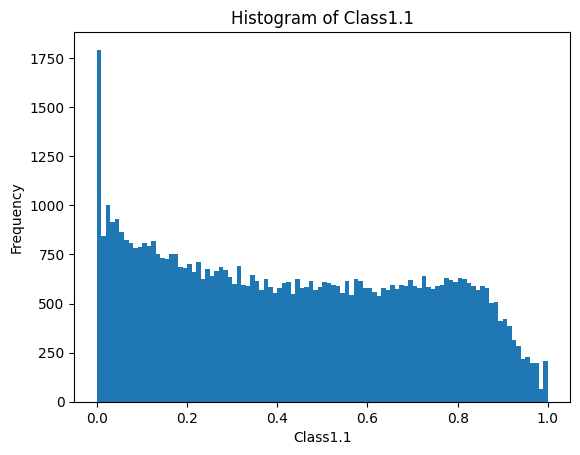

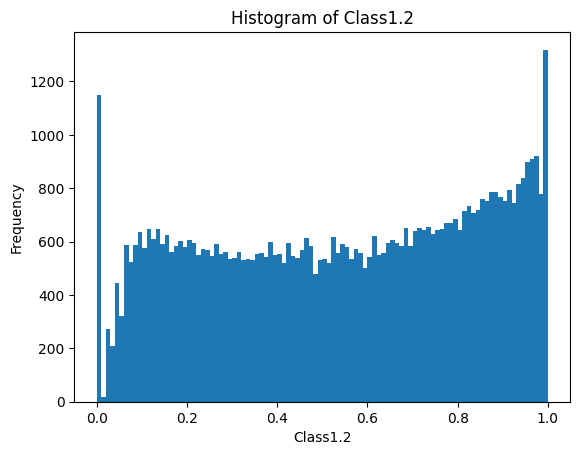

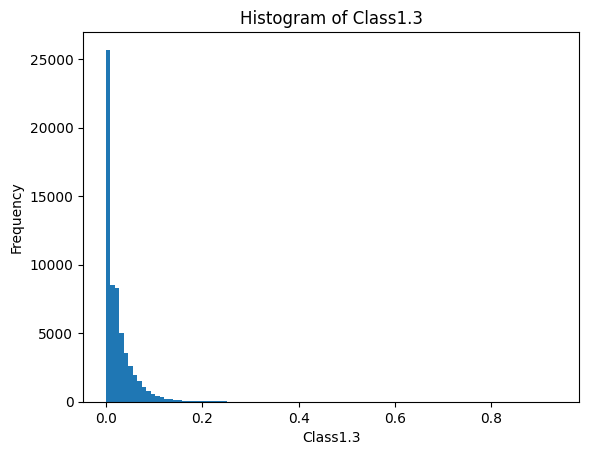

In [18]:
# try to visualize the distribution of the 3 labels
columns = ["Class1.1", "Class1.2", "Class1.3"]
for col in columns:
    plt.hist(target_labels[col], bins=100)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.show()

        

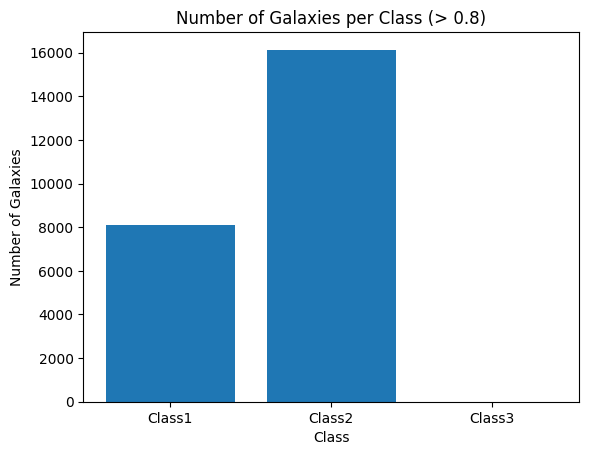

In [19]:
import matplotlib.pyplot as plt

# Conta gli ID che superano la soglia in ciascuna classe
n_class1 = (target_labels["Class1.1"] > 0.8).sum()
n_class2 = (target_labels["Class1.2"] > 0.8).sum()
n_class3 = (target_labels["Class1.3"] > 0.8).sum()

# Plot della distribuzione
labels = ["Class1", "Class2", "Class3"]
values = [n_class1, n_class2, n_class3]

plt.bar(labels, values)
plt.xlabel("Class")
plt.ylabel("Number of Galaxies")
plt.title("Number of Galaxies per Class (> 0.8)")
plt.show()


n_classes
0    37331
1    24247
Name: count, dtype: int64


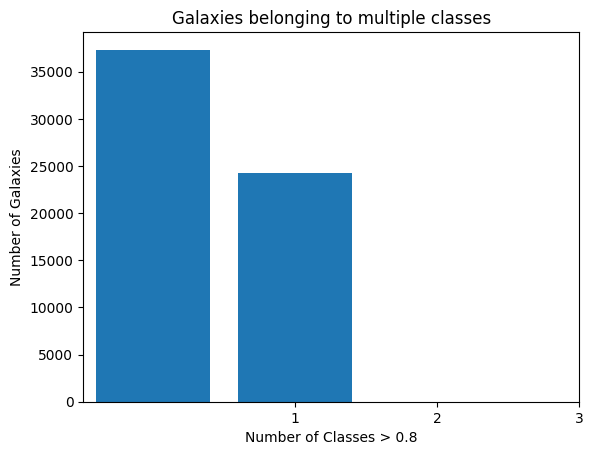

In [20]:
# Crea una nuova colonna con il numero di classi in cui ogni riga supera 0.8
class_cols = ["Class1.1", "Class1.2", "Class1.3"]
target_labels["n_classes"] = (target_labels[class_cols] > 0.8).sum(axis=1)

# Conta quante righe rientrano in 1, 2 o 3 classi
counts = target_labels["n_classes"].value_counts().sort_index()

# Stampa
print(counts)

# Plot
plt.bar(counts.index, counts.values)
plt.xlabel("Number of Classes > 0.8")
plt.ylabel("Number of Galaxies")
plt.title("Galaxies belonging to multiple classes")
plt.xticks([1, 2, 3])
plt.show()


## First Exercise

In the first exercise, we only consider the top-level question (3 answers) and samples where at least 80 % of participants gave the same answer.
We assume this to be a certain classification and transform them to one-hot encoded labels.
The task is to provide a classifier that correctly classifies the images.

In [17]:
## loop through files
## check for condition (max of first three labels is >= 0.8)
## if true, create hot-encoded label
## copy file to folder
## save all labels in csv file

folder_1 = "data/exercise_1/"
folder_images_1 = folder_1 + "/images"
file_labels_1 = folder_1 + "labels.csv"

def condition(label):
    """ for (N,L)-tensor of labels (float: 0-1) return (N,1)-boolean-tensor 
    with True if one of first three floats is >= 0.8 """
    ground = label[:,1:4] >= 0.8
    return torch.sum(ground, dim=1).bool() #, keepdims=True)

files_1 = []
labels_1 = []

for files, label in data_loader_original:
    cond = condition(label)
    files_1 += [f for f, c in zip(files, cond) if c]
    labels_1 += [torch.round(label[torch.where(cond)[0],:4])]

labels_1 = torch.cat(labels_1)
labels_1 = pd.DataFrame(labels_1.numpy(), columns=target_labels.columns[:4])

os.makedirs(folder_images_1, exist_ok=True)

[shutil.copy(file, folder_images_1 + file.split('/')[-1]) for file in files_1]
    
labels_1.to_csv('data/exercise_1/labels')

RuntimeError: torch.cat(): expected a non-empty list of Tensors

In [18]:
labels_1.to_csv('data/exercise_1/labels.csv')

AttributeError: 'list' object has no attribute 'to_csv'

## Second Exercise

In the second exercise, we consider the second layer of questions, i. e. Q2 and Q7.
Here, we do not use one-hot encoded labels, but the original floats that range between 0 and 1, thus making the classification problem a regression problem.
Here we can use all images in the dataset (no separate copy is produced).
Students should take care that the output of their classifier has to match the hierarchical structure of questions, e. g. the the summed values for Q2 equal the value for answer Q1.1.

In [8]:
folder_2 = "data/exercise_2/"
file_labels_2 = folder_2 + "labels.csv"

def select_questions(*questions):
    col = target_labels.columns
    result = [col[0]]
    for q in questions:
        result += [c for c in col if f"Class{q}." in c]
    return result

!mkdir -p $folder_2

labels_2 = target_labels[select_questions(1,2,7)]
labels_2.to_csv(file_labels_2)
labels_2

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class7.1,Class7.2,Class7.3
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.201463,0.181684,0.000000
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.000000,0.135082,0.191919
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.741864,0.023853
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.408599,0.284778,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.494587,0.439252,0.000000
...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.410816,0.099563
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.404841,0.496375,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.030477,0.172364,0.000000
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.045500,0.045500,0.000000


In [9]:
file_labels_2

'data/exercise_2/labels.csv'

## Third Exercise

In the third exercise, we further include questions Q6 and Q8 regarding oddities.
The students have to improve their architectures in order to correctly classify rare object classes.
Again, all images can be used.

In [10]:
folder_3 = "data/exercise_3/"
file_labels_3 = folder_3 + "labels.csv"

!mkdir -p $folder_3

labels_3 = target_labels[select_questions(1,2,6,7,8)]
labels_3.to_csv(file_labels_3)
labels_3

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.054453,0.945547,0.201463,0.181684,0.000000,0.00000,0.027227,0.000000,0.027227,0.000000,0.000000,0.000000
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.189149,0.810851,0.000000,0.135082,0.191919,0.00000,0.000000,0.140353,0.000000,0.048796,0.000000,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,1.000000,0.000000,0.741864,0.023853,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.320398,0.679602,0.408599,0.284778,0.000000,0.00000,0.000000,0.096119,0.096119,0.000000,0.128159,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.029383,0.970617,0.494587,0.439252,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.029383,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61573,999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.245734,0.754266,0.000000,0.410816,0.099563,0.03514,0.000000,0.000000,0.000000,0.175454,0.035140,0.000000
61574,999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.127644,0.872356,0.404841,0.496375,0.000000,0.00000,0.000000,0.021321,0.000000,0.062095,0.044229,0.000000
61575,999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.839186,0.160814,0.030477,0.172364,0.000000,0.00000,0.000000,0.033567,0.134270,0.067135,0.604214,0.000000
61576,999964,0.091000,0.909000,0.000000,0.045450,0.863550,0.864000,0.136000,0.045500,0.045500,0.000000,0.09072,0.000000,0.090720,0.136512,0.045792,0.500256,0.000000
